**оценка классификатора**


Евгений Борисов <esborisov@sevsu.ru>


---

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## строим датасет

In [2]:
from sklearn.datasets import make_moons

n_samples=800
X,y = make_moons(n_samples=n_samples, noise=.2)
X.shape, y.shape

((800, 2), (800,))

## выделяем тестовый набор

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320, 2), (320,), (480, 2), (480,))

In [4]:
%xdel X
%xdel y

## рисуем датасет

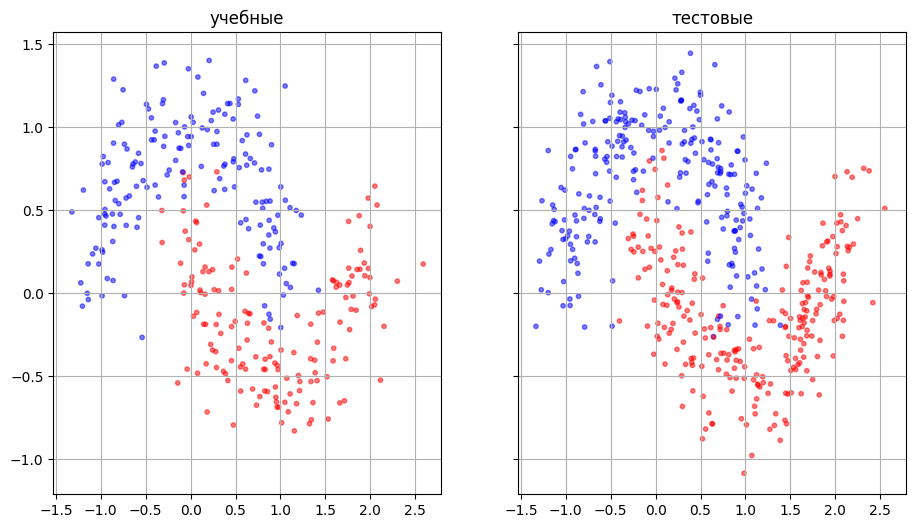

In [5]:
f, axarr = plt.subplots(1,2, sharey=True, sharex=True, figsize=(11,6),)
    
axarr[0].set_title('учебные')
axarr[0].scatter( x=X_train[:,0], y=X_train[:,1], c=[['b','r','g','y'][j] for j in y_train ], s=10, alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('тестовые')
axarr[1].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in y_test], s=10, alpha=0.5 )
axarr[1].grid()

plt.show()

## обучаем клаасификатор

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(metric='euclidean')

clf.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

## тестируем классификатор

In [7]:
p = clf.predict_proba(X_test)
r = (p[:,1]>0.5).astype(int)

### рисуем результат

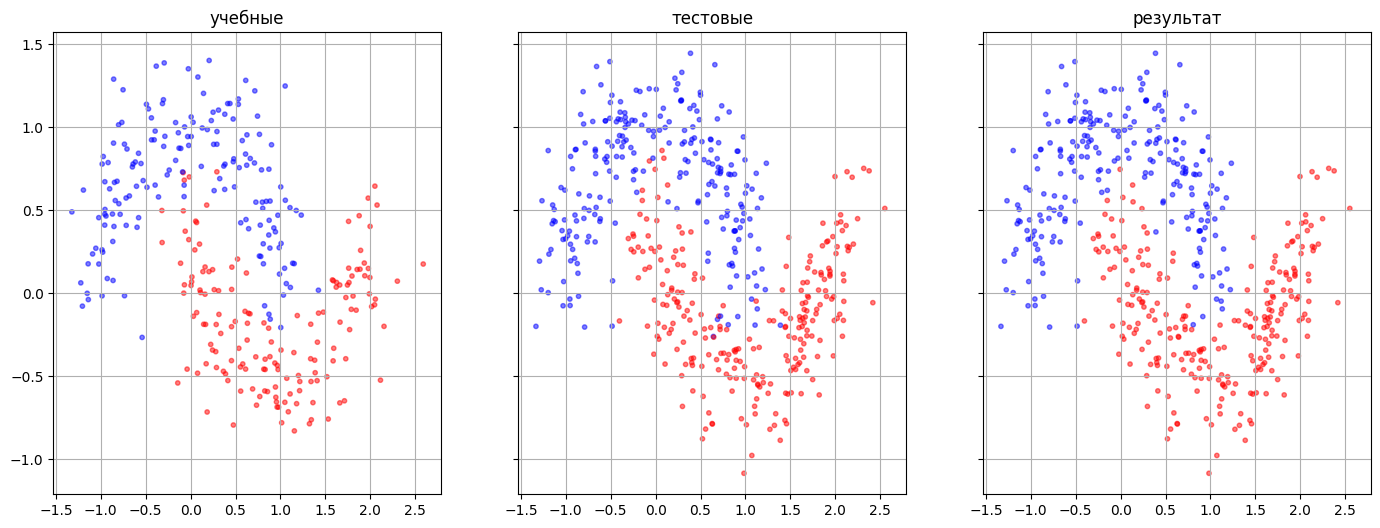

In [8]:
f, axarr = plt.subplots(1,3, sharey=True, sharex=True, figsize=(17,6),)
    
axarr[0].set_title('учебные')
axarr[0].scatter( x=X_train[:,0], y=X_train[:,1], c=[['b','r','g','y'][j] for j in y_train ], s=10, alpha=0.5 )
axarr[0].grid()
axarr[1].set_title('тестовые')
axarr[1].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in y_test], s=10, alpha=0.5 )
axarr[1].grid()
axarr[2].set_title('результат')
axarr[2].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in r], s=10, alpha=0.5 )
axarr[2].grid()

plt.show()

### считаем метрики качества

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

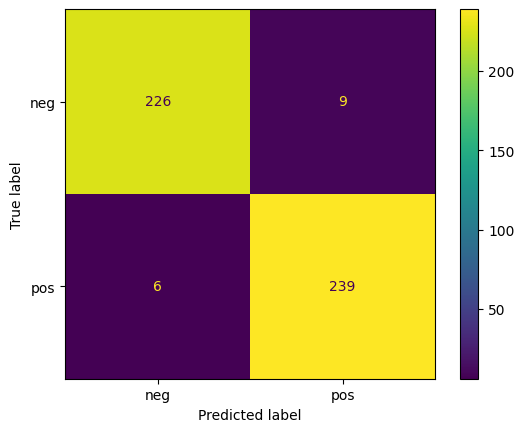

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, r), 
    display_labels=classes
).plot()


In [9]:
from sklearn.metrics import classification_report

# таблица метрик качества классификации на тестовом наборе
print( classification_report(y_test,r) )

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       235
           1       0.96      0.98      0.97       245

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



### рисуем ROC

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

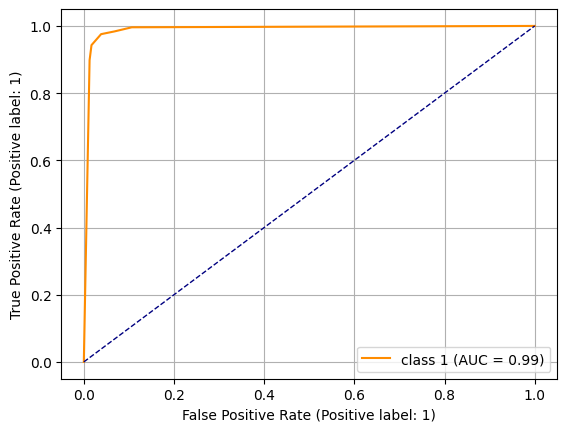

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions( y_test, p[:,1], name="class 1", color="darkorange", )
plt.plot([0,1],[0,1], color='navy', lw=1, linestyle='--')
plt.grid()

## визуализация результатов класификатора

In [11]:
# строим сетку и определяем значения скора классификатора во всех узлах

n=500 # количество разбиений сетки

xx,yy = np.meshgrid(
    np.linspace( X_test[:,0].min()-0.1, X_test[:,0].max()+0.1, n), 
    np.linspace( X_test[:,1].min()-0.1, X_test[:,1].max()+0.1, n)
) # узлы сетки

xx.shape, yy.shape

xy = np.vstack([xx.ravel(),yy.ravel() ]).T # разворачиваем сетку 
xy.shape

(250000, 2)

In [12]:
%%time 

rr = clf.predict(xy).reshape(n,n) # вычисляем скор для каждого узла сетки

CPU times: user 4.2 s, sys: 0 ns, total: 4.2 s
Wall time: 4.2 s


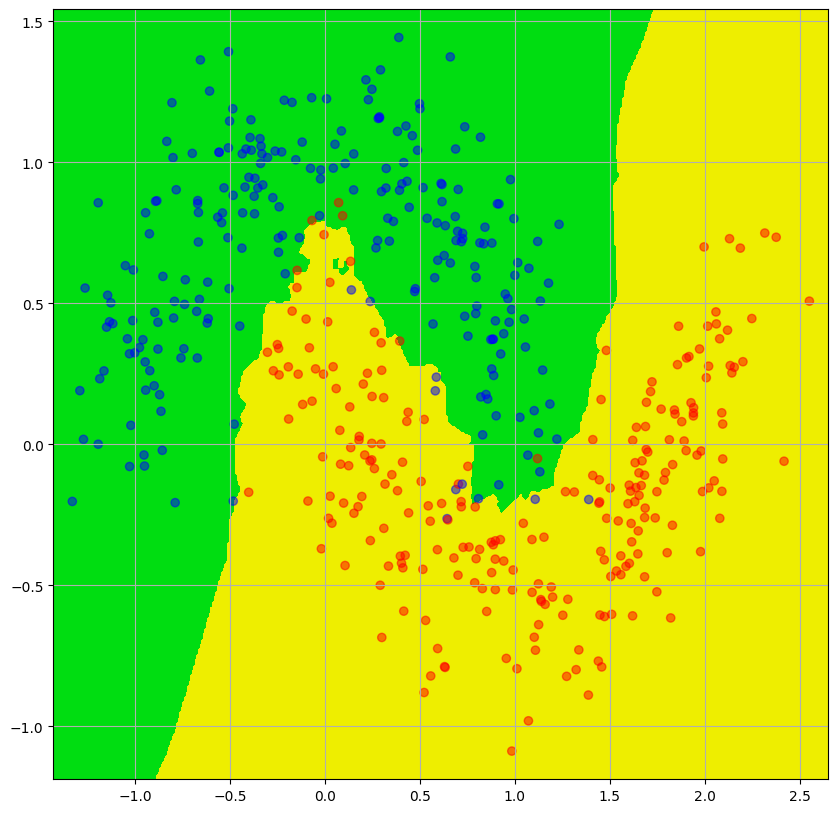

In [13]:
from matplotlib.colors import ListedColormap
cm=ListedColormap(['#00dd11','#eeee00'])

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, rr, cmap=cm)
c = [ ['b','r'][ int(j>0.5) ] for j in y_test  ]
plt.scatter( x=X_test[:,0], y=X_test[:,1], c=c, alpha=.5 )
plt.grid()
plt.show()